In [9]:
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 
import numpy as np
import sklearn as sc
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats import zscore




Dataset1 = pd.read_csv("BTC-USD.csv")

In [2]:
Dataset1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-01,430.721008,436.246002,427.515015,434.334015,434.334015,3.627890e+07
1,2016-01-02,434.622009,436.062012,431.869995,433.437988,433.437988,3.009660e+07
2,2016-01-03,433.578003,433.743011,424.705994,430.010986,430.010986,3.963380e+07
3,2016-01-04,430.061005,434.516998,429.084015,433.091003,433.091003,3.847750e+07
4,2016-01-05,433.069000,434.182007,429.675995,431.959991,431.959991,3.452260e+07
...,...,...,...,...,...,...,...
2146,2021-11-16,63721.195313,63721.195313,59016.335938,60161.246094,60161.246094,4.684434e+10
2147,2021-11-17,60139.621094,60823.609375,58515.410156,60368.011719,60368.011719,3.917839e+10
2148,2021-11-18,60360.136719,60948.500000,56550.792969,56942.136719,56942.136719,4.138834e+10
2149,2021-11-19,56896.128906,58351.113281,55705.179688,58119.578125,58119.578125,3.870241e+10


                                                   **BITCOIN, UN FENEMOMENO FINANCIERO**

**Introduccion**

La investigación que realizamos sobre el BITCOIN analiza la moneda digital descentralizada y busca detectar tendencias, cambios y patrones a través de los años. Identificamos varios problemas comerciales, entre ellos, la alta volatilidad, el elevado consumo energético, la limitación del sistema, los elevados costos de transacción y la desregulación. Nos propusimos desarrollar un algoritmo que pueda predecir futuros precios a partir de la información histórica. La investigación comienza con un análisis exploratorio de datos (EDA) para extraer la mayor cantidad de información posible del dataset. Luego recopilamos en tiempo real varaicion del valor desde una API publica y finalmente ordenamos y limpiamos toda esa informacion en pos de orientarnos hacia las respuestas mas acertadas de las siguientes preguntas:


**EDA**

Comenzamos con nuestro analisis exploratorio de datos (EDA) en el que intentaremos extraer de la manera mas limpia y efectiva posible la mayor informacion de nuestro dataset. Algunas de las cuestiones a ejemplificar seran las siguientes:

1-¿Con que tipo de datos estamos trabajando?

2-¿Cuenta con datos duplicados o nulos?

Gráfico 1: 

3- ¿Como es la relación entre el precio y el tiempo? 

4- ¿En que porcentaje aumentó?

Gráfico 2:

5- ¿Como es la relación entre "Highs" y "Lows"?

6- ¿Tiene una pendiente creciente o decreciente?

Gráfico 3:

7- ¿Como es la relación entre el volumen y el tiempo?

8- ¿Fue aumentando o descendiendo?

Gráfico 4

9- ¿Como se distribuyeron los mínimos en cada año?

10- ¿Como es la relación de mínimos entre los años?

Gráfico 5

11- ¿Como se distribuyeron los máximos en cada año?

12- ¿Son máximos mayores o menores?

Gráfico 6

13- ¿Como es la relación entre los años, el volumen y el precio?

14- ¿Hay alguna tendencia?

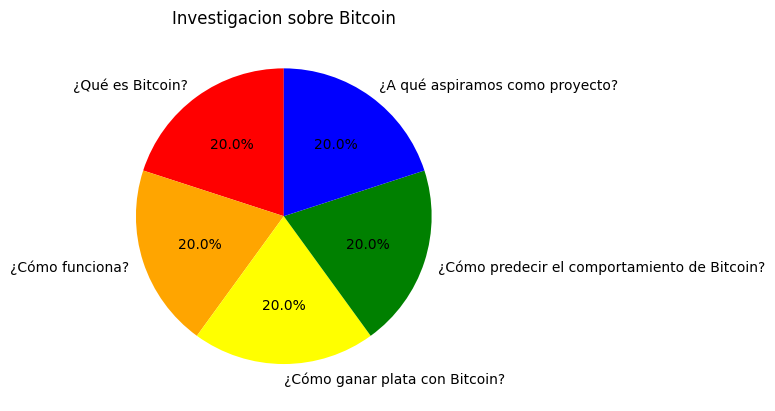

In [ ]:
#@title Así dividimos nuestra información


datos = [1, 1, 1, 1, 1]
etiquetas = ['¿Qué es Bitcoin?', '¿Cómo funciona?', '¿Cómo ganar plata con Bitcoin?', '¿Cómo predecir el comportamiento de Bitcoin?', '¿A qué aspiramos como proyecto?']
colores = ['red', 'orange', 'yellow', 'green', 'blue']


plt.pie(datos, labels=etiquetas, colors=colores, autopct='%1.1f%%', startangle=90)
plt.title('Investigacion sobre Bitcoin')
plt.show()

**Storytelling**

La investigación que realizamos sobre el Bitcoin analiza la moneda digital descentralizada y busca detectar tendencias, cambios y patrones a través de los años. Identificamos varios problemas comerciales, entre ellos, la alta volatilidad, el elevado consumo energético, la limitación del sistema, los elevados costos de transacción y la desregulación. Nos propusimos desarrollar un algoritmo que pueda predecir futuros precios a partir de la información histórica. La investigación comienza con un análisis exploratorio de datos (EDA) para extraer la mayor cantidad de información posible del dataset. Luego recopilamos en tiempo real varaicion del valor desde una API publica y finalmente ordenamos y limpiamos toda esa informacion en pos de orientarnos hacia las respuestas mas acertadas de las siguientes preguntas.



**Presentación para Inversores:** https://app.simplified.com/designs/752527b1-d04f-49c2-ab69-6ca0c8476a30/share?utm_content=752527b1-d04f-49c2-ab69-6ca0c8476a30&utm_campaign=share&utm_medium=link&utm_source=projectlinks

**Abstract**

Bitcoin es una moneda digital descentralizada creada en enero de 2009. Sigue las ideas expuestas en un Whitepaper por el misterioso y seudónimo Satoshi Nakamoto.12 La identidad de la persona o personas que crearon la tecnología sigue siendo un misterio. Bitcoin ofrece la promesa de tarifas de transacción más bajas que los mecanismos tradicionales de pago en línea y, a diferencia de las monedas emitidas por los gobiernos, es operado por una autoridad descentralizada.
En este Dataset, podemos apreciar diferentes datos de este criptoactivo con el correr de los años. Buscamos también, detectar tendencias, cambios y patrones a través de los años.

Problema comercial:

¿solución o problema?
Demasiado volátil. Estructuralmente el bitcoin es demasiado volátil para que se consolide como sistema de transacción o activo de inversión estable. Los movimientos de doble dígito dentro de la misma sesión han sido una constante durante los últimos meses, algo que es un problema para los particulares pero aún más para cualquier negocio que tiene que planificar con antelación y que, en muchos casos, trabaja con márgenes reducidos. Para que el Bitcoin pueda ser una referencia, no puede estar sujeto a subidas y bajadas en su cotización de tan tremenda volatilidad.

Ineficiente. El consumo energético procedente de la minería de bitcoin ya alcanza niveles tan elevados como el de toda la energía que se consume en países como Hungría, Qatar o Nueva Zelanda.


Limitación del sistema. Si no se extrae el bitcoin, las transacciones no se aprueban y no se producen nuevos bitcoins. Hasta el 13 de enero se han extraído 16.800.000 bitcoins acercándose a los máximos históricos registrados en 21 millones de monedas extraídas. Cuando se hayan extraído todos los bitcoins, el suministro ya no podrá crecer más.

Elevados costes de transacción. Uno de los principales problemas a los que se enfrenta el bitcoin son los elevados costes de una simple transacción. 

Las elevadísimas tasas de transacción están cambiando fundamentalmente el bitcoin. Originalmente, uno de los mayores atractivos comerciales del bitcoin era que los pagos de las transacciones eran rápidas, cómodos y, lo más importante, baratos.

Desregulación. Una de las características particulares de la criptodivisa es su naturaleza descentralizada. Ningún banco central la apoya ni las operaciones pueden ser rastreadas.

**Propuesta**

Nuestra investigación sobre el Bitcoin aborda las tendencias, cambios y sus patrones. A partir del aumento del precio de este criptoactivo  buscamos  desarrollar un algoritmo que pudiese predecir futuros precios a partir de la información histórica brindada.

**Respuestas de la EDA acerca de nulos y tipos de datos**

1- En su mayoría estamos trabajando con Flotantes, es decir, números brutos o que contienen decimales

2- Sí, tenemos datos nulos los cuales ya fueron eliminados. No contamos duplicados

**Identificación y trabajo de los datos**

En esta parte identificacmos los datos y los trabajamos de la siguiente manera

- Eliminamos nulos y duplicados 

- Verificamos con que tipos de datos trabajamos

- Creamos la columna "Year" para poder trabajar los datos por años (Data Normalization y Binning)

In [ ]:
# Dropeamos Duplicados y Nulos:
Dataset1.drop_duplicates(inplace=True)
Dataset1 = Dataset1.dropna()
Dataset1.shape

(2147, 7)

In [ ]:
#Verificamos que ya no haya nulos
Dataset1.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
# Verificamos con que tipo de datos estamos trabajando
Dataset1.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [ ]:
Dataset1['Date'] = pd.to_datetime(Dataset1['Date'])
Dataset1['Year'] = Dataset1['Date'].dt.year
Dataset1 = Dataset1.dropna(subset=['Close'])
median = Dataset1['Close'].median()
Dataset1['Close'] = Dataset1['Close'].fillna(median)
imputer = SimpleImputer(strategy='median')
X = Dataset1[['Year']]
y = Dataset1['Close']
X = imputer.fit_transform(X)
y = imputer.fit_transform(y.values.reshape(-1,1))

<ipython-input-8-091188dadd3b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataset1['Date'] = pd.to_datetime(Dataset1['Date'])
<ipython-input-8-091188dadd3b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataset1['Year'] = Dataset1['Date'].dt.year


In [ ]:
Dataset1['Year'] = Dataset1['Year'].astype('float64')

In [ ]:
# Convertimos la columna "Date" a un formato Datetime
Dataset1['Date'] = pd.to_datetime(Dataset1['Date'])

**Outliers**

Los outliers pueden afectar negativamente nuestro análisis al aumentar la varianza y afectar la normalidad de los datos. Además, pueden generar resultados inesperados y llevar a conclusiones incorrectas si no se tratan adecuadamente.

En este caso, los outliers nos permiten relacionar el valor de Bitcoin en relación con eventos específificos que afecten en como varía su precio.



In [ ]:
Q1 = Dataset1['Close'].quantile(0.25)
Q3 = Dataset1['Close'].quantile(0.75)

# Calcular el rango intercuartil
IQR = Q3 - Q1

# Definir los límites del rango aceptable
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar los valores que están fuera del rango aceptable
outliers = Dataset1[(Dataset1['Close'] < limite_inferior) | (Dataset1['Close'] > limite_superior)]

# Calcular la desviación estándar
desviacion_estandar = Dataset1['Close'].std()

# Identificar los valores que están a más de dos desviaciones estándar de la media
outliers_sd = Dataset1[(Dataset1['Close'] < Dataset1['Close'].mean() - 2*desviacion_estandar) | (Dataset1['Close'] > Dataset1['Close'].mean() + 2*desviacion_estandar)]


Se calcula el primer cuartil (Q1) y el tercer cuartil (Q3) de los datos de precios en dólares utilizando la función quantile() de pandas. Estos valores se utilizan para calcular el rango intercuartil (IQR) en el siguiente paso.
Se calcula el rango intercuartil (IQR) como la diferencia entre Q3 y Q1.
Se definen los límites del rango aceptable como Q1 - 1.5 * IQR para el valor mínimo y Q3 + 1.5 * IQR para el valor máximo. Los valores que se encuentran fuera de estos límites se consideran outliers y se identifican en el siguiente paso.
Se identifican los valores que están fuera del rango aceptable utilizando la función [(df['Precio USD'] < limite_inferior) | (df['Precio USD'] > limite_superior)]. Estos valores se almacenan en la variable outliers.
Se calcula la desviación estándar de los datos de precios en dólares utilizando la función std() de pandas.
Se identifican los valores que están a más de dos desviaciones estándar de la media utilizando la función [(df['Precio USD'] < df['Precio USD'].mean() - 2*desviacion_estandar) | (df['Precio USD'] > df['Precio USD'].mean() + 2*desviacion_estandar)]. Estos valores se almacenan en la variable outliers_sd

In [ ]:
print('Limite inferior: ' , limite_inferior)

print('Limite superior: ' , limite_superior)

print('Outliers: ')   
print(outliers)

print('DS: ' , desviacion_estandar)

print('outliers DS: ')       
print(outliers_sd)

Limite inferior:  -10127.944580250001
Limite superior:  23591.62768575
Outliers: 
           Date          Open          High           Low         Close  \
1814 2020-12-19  23132.865234  24085.855469  22826.472656  23869.832031   
1817 2020-12-22  22794.039063  23789.902344  22430.605469  23783.029297   
1819 2020-12-24  23240.203125  23768.337891  22777.597656  23735.949219   
1820 2020-12-25  23733.570313  24710.101563  23463.673828  24664.791016   
1821 2020-12-26  24677.015625  26718.070313  24522.689453  26437.037109   
...         ...           ...           ...           ...           ...   
2146 2021-11-16  63721.195313  63721.195313  59016.335938  60161.246094   
2147 2021-11-17  60139.621094  60823.609375  58515.410156  60368.011719   
2148 2021-11-18  60360.136719  60948.500000  56550.792969  56942.136719   
2149 2021-11-19  56896.128906  58351.113281  55705.179688  58119.578125   
2150 2021-11-20  58137.187500  59040.605469  57976.265625  58493.925781   

         Adj Clos

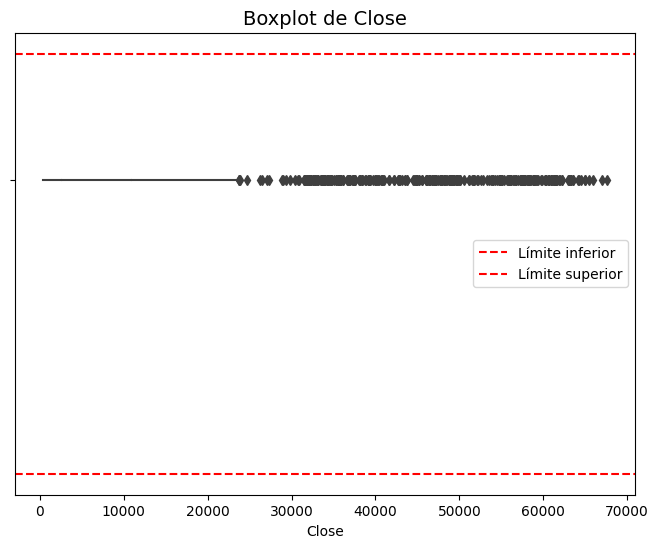

In [ ]:
#Este gráfico muestra los cuartiles, los límites y los outliers identificados en el código.
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x=Dataset1['Close'], ax=ax)
ax.set_title('Boxplot de Close', fontsize=14)
ax.axhline(y=limite_inferior, color='r', linestyle='--', label='Límite inferior')
ax.axhline(y=limite_superior, color='r', linestyle='--', label='Límite superior')
ax.legend()
plt.show()

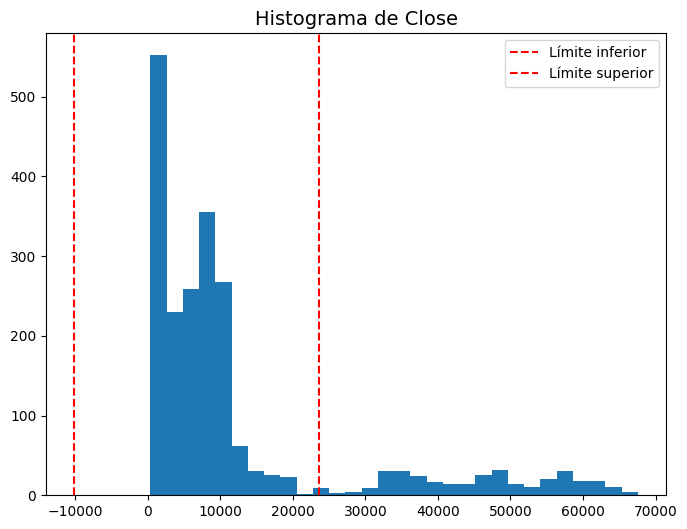

In [ ]:
#Este gráfico muestra la frecuencia de los valores de Close y los límites definidos.
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(Dataset1['Close'], bins=30)
ax.set_title('Histograma de Close', fontsize=14)
ax.axvline(x=limite_inferior, color='r', linestyle='--', label='Límite inferior')
ax.axvline(x=limite_superior, color='r', linestyle='--', label='Límite superior')
ax.legend()
plt.show()

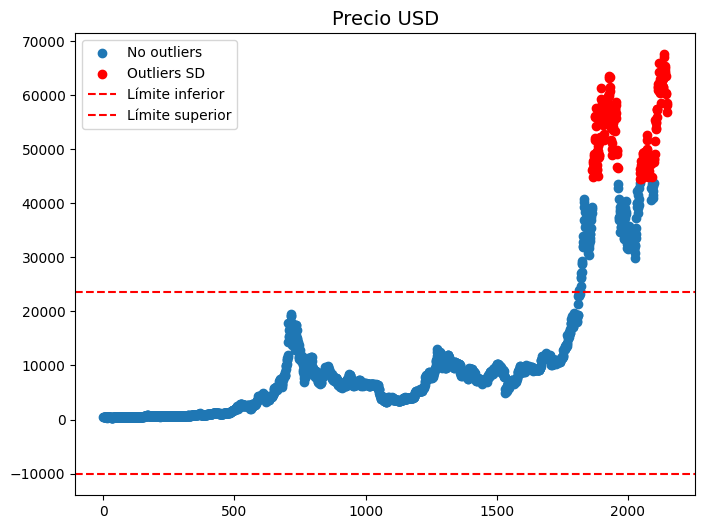

In [ ]:
#Este gráfico muestra los valores de Precio USD que son outliers y los que no lo son, y los límites definidos.
outliers_sd = Dataset1[(Dataset1['Close'] < Dataset1['Close'].mean() - 2*(desviacion_estandar)) | (Dataset1['Close'] > Dataset1['Close'].mean() + 2*desviacion_estandar)]
no_outliers = Dataset1[(Dataset1['Close'] >= Dataset1['Close'].mean() - 2*desviacion_estandar) & (Dataset1['Close'] <= Dataset1['Close'].mean() + 2*desviacion_estandar)]

fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(no_outliers.index, no_outliers['Close'], label='No outliers')
ax.scatter(outliers_sd.index, outliers_sd['Close'], label='Outliers SD', color='r')
ax.axhline(y=limite_inferior, color='r', linestyle='--', label='Límite inferior')
ax.axhline(y=limite_superior, color='r', linestyle='--', label='Límite superior')
ax.set_title('Precio USD', fontsize=14)
ax.legend()
plt.show()

<function seaborn.distributions.displot(data=None, *, x=None, y=None, hue=None, row=None, col=None, weights=None, kind='hist', rug=False, rug_kws=None, log_scale=None, legend=True, palette=None, hue_order=None, hue_norm=None, color=None, col_wrap=None, row_order=None, col_order=None, height=5, aspect=1, facet_kws=None, **kwargs)>

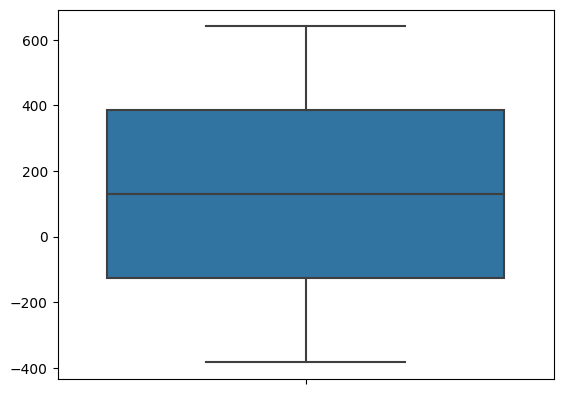

In [ ]:
# Datos del boxplot
lim_inf = -383.68754289735335
lim_sup = 640.9014673408215

# Crear la figura del boxplot
fig = sns.boxplot(y=[lim_inf, lim_sup])

# Mostrar el gráfico
sns.displot


## Análisis Exploratorio

**Analisis Univariado**

Precio Vs Fecha

Podemos ver que la evolucion del precio por dia del Bitcoin se mantuvo realmente estable en volatibilidad entre el 1/01/2018 y 30/12/2020, llegando a su primer punto maximo el año 2021.

Podemos apreciar que que el año con mayor valor de volumen fue el año 2021 y que el segundo mayor año con valor de volumen fue el 2022. Esto puede explicar por que en el año 2021 el Bitcoin dio un salto muy importante en el aumento de su precio, dado que ingresaron grandes cantidades de dinero al mercado realizando importantes compras en la moneda.

In [ ]:

#grafico de barras con la evolucion del valor de cierre por fecha
Grafico = px.bar(Dataset1, x='Date', y='Close',
                     color='Close',
                     template='gridon',
                     labels={'Fecha':'Date', 'Valor':'Close'},
                     title='Evolucion Bitcoin por dia',
                     height=550)
Grafico.show();

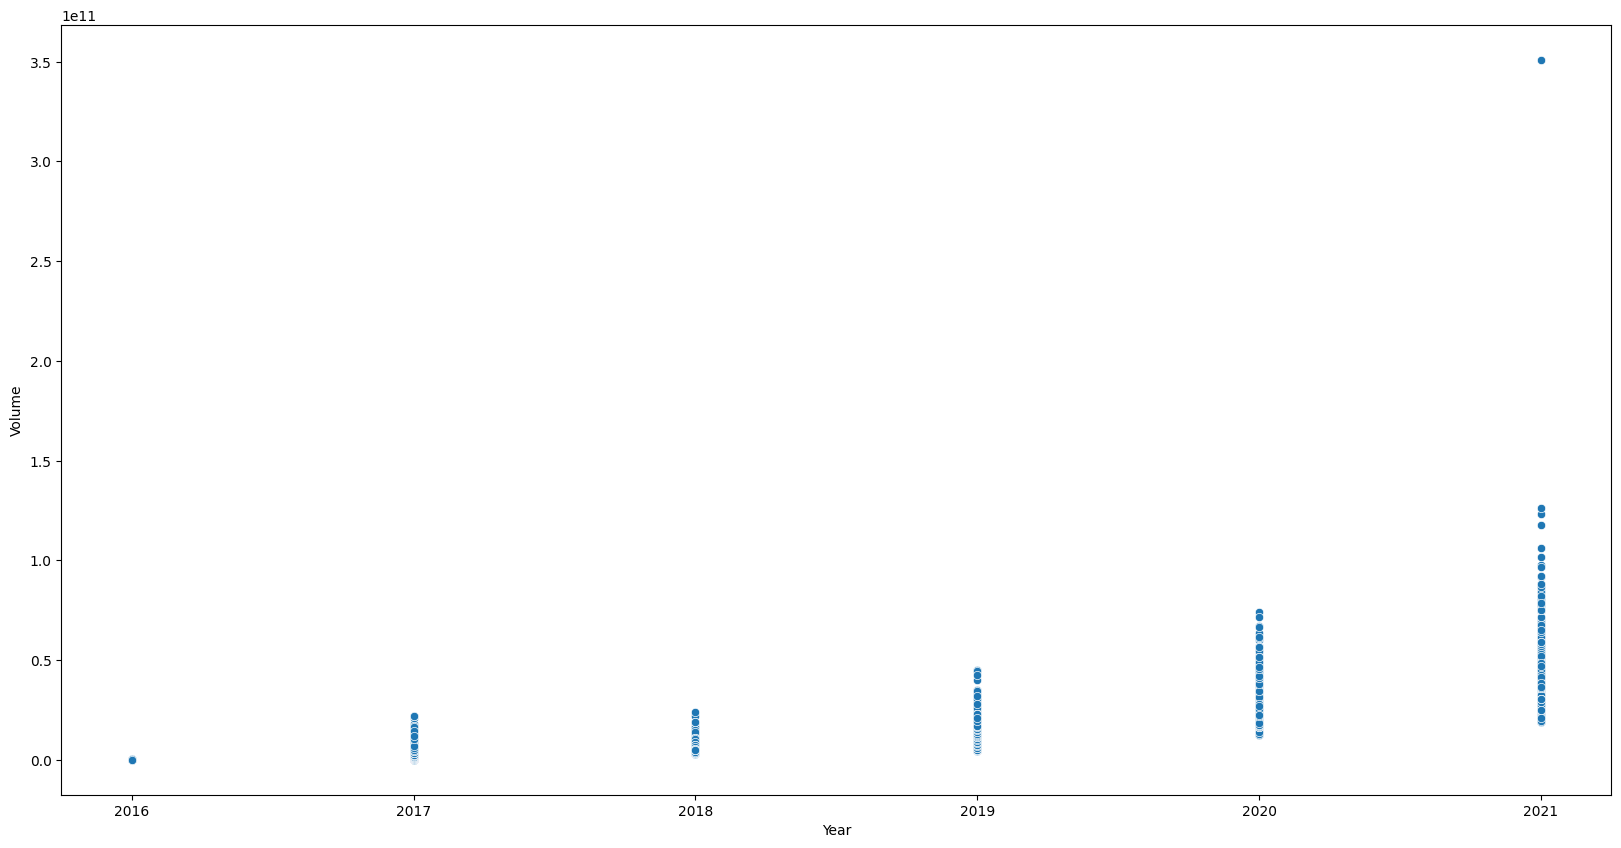

In [ ]:
x = Dataset1['Year']
y = Dataset1['Volume']


plt.figure(figsize=(20,10))
sns.scatterplot(x=x, y=y)
plt.show()

**Gráficos**

Graficamos la información para posteriormente modelarla

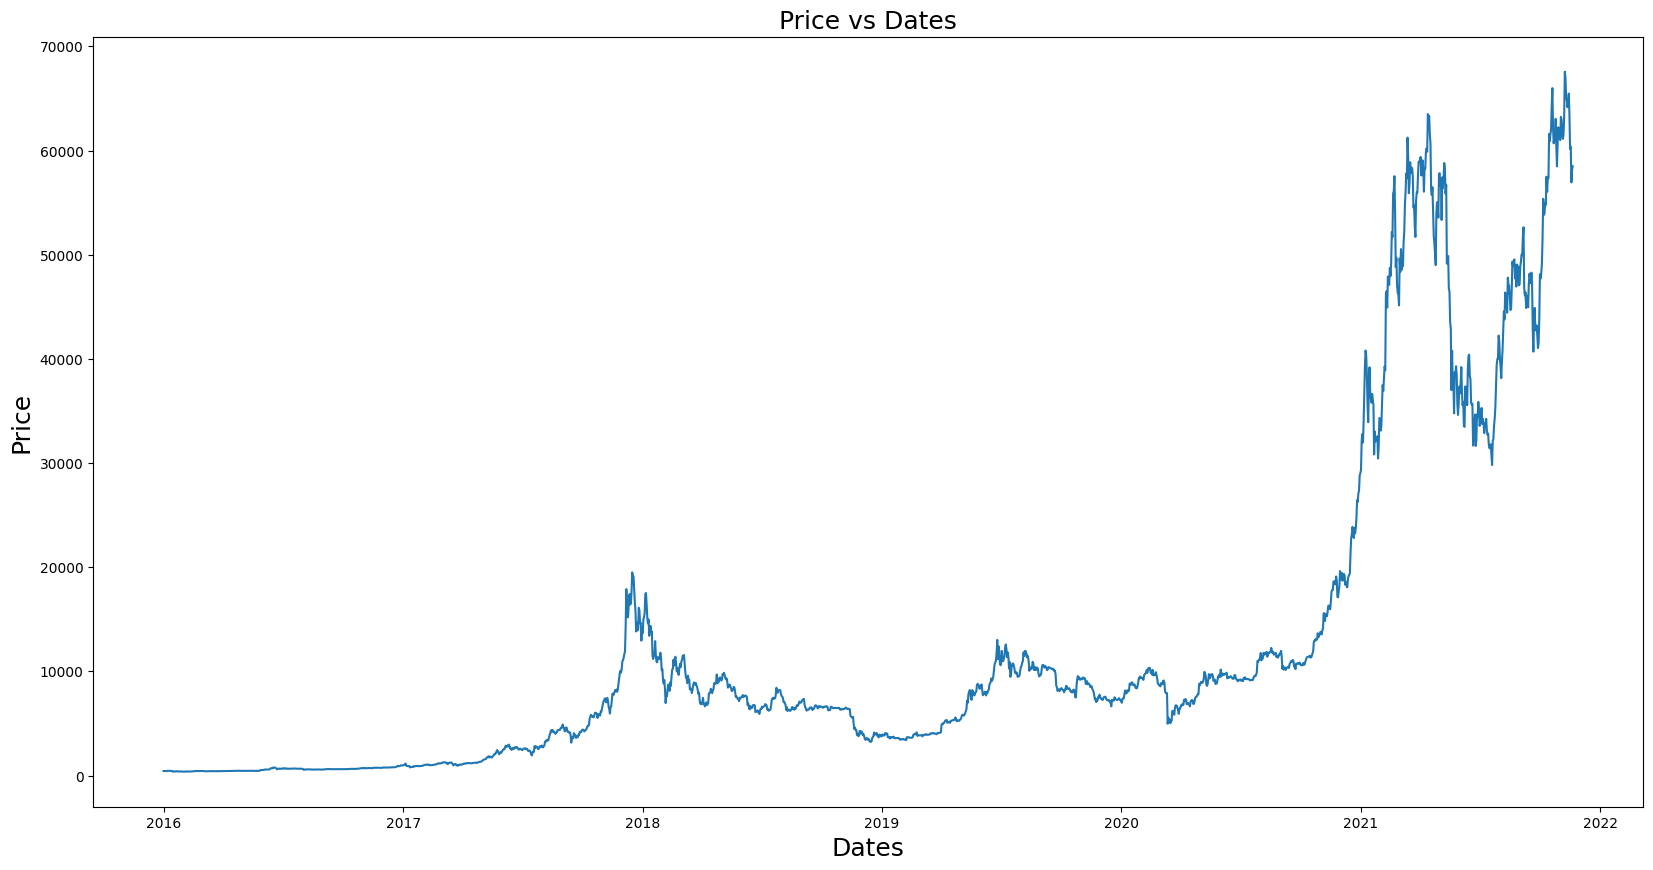

In [ ]:
#Gráfico 1

x = Dataset1['Date']
y = Dataset1['Close']

plt.figure(figsize=(20,10))

plt.xlabel('Dates', fontsize=18)
plt.ylabel('Price', fontsize=18, rotation=90)
plt.title('Price vs Dates', fontsize=18)
plt.plot(x, y)

plt.show()

1-¿Con que tipo de datos estamos trabajando?

En su mayoría estamos trabajando con Flotantes, es decir, números brutos o que contienen decimales.

2-¿Cuenta con datos duplicados o nulos?

Sí, tenemos datos nulos los cuales ya fueron eliminados. No contamos duplicados.

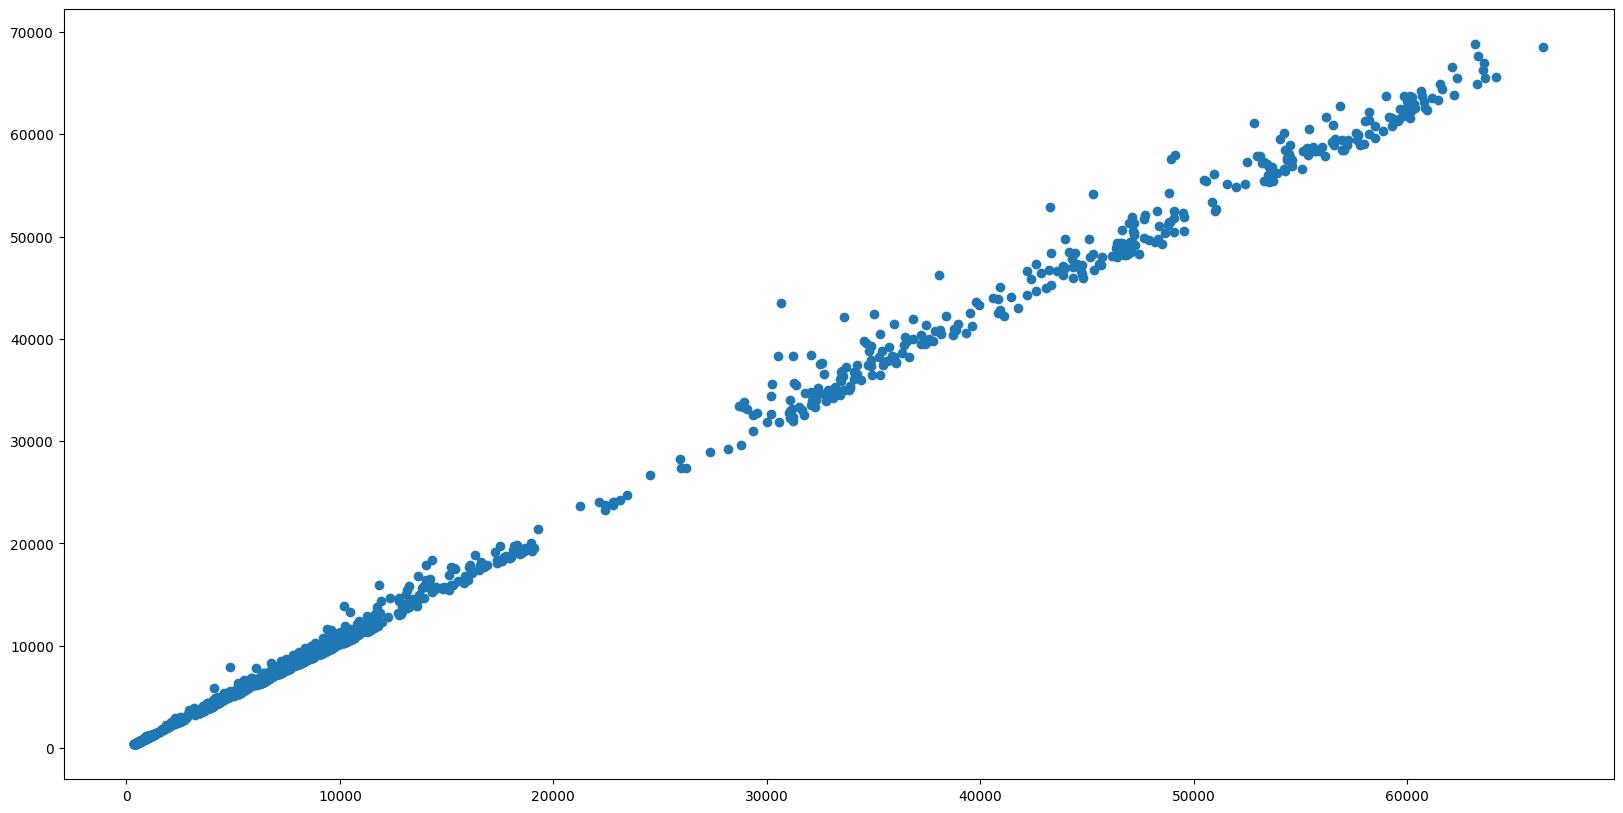

In [ ]:
#Gráfico 2

x = Dataset1['Low']
y = Dataset1['High']

plt.figure(figsize=(20,10))
plt.scatter(x,y)

3- ¿Como es la relación entre el precio y el tiempo? 
 
Con el correr del tiempo, podemos apreciar que la tendencia es alcista. Si bien no siempre se mantiene así, habiendo fluctuaciones e incluso años bajistas, la tendencia general si es alcista

4- ¿En que porcentaje aumentó?

El precio aumento en un 13000%

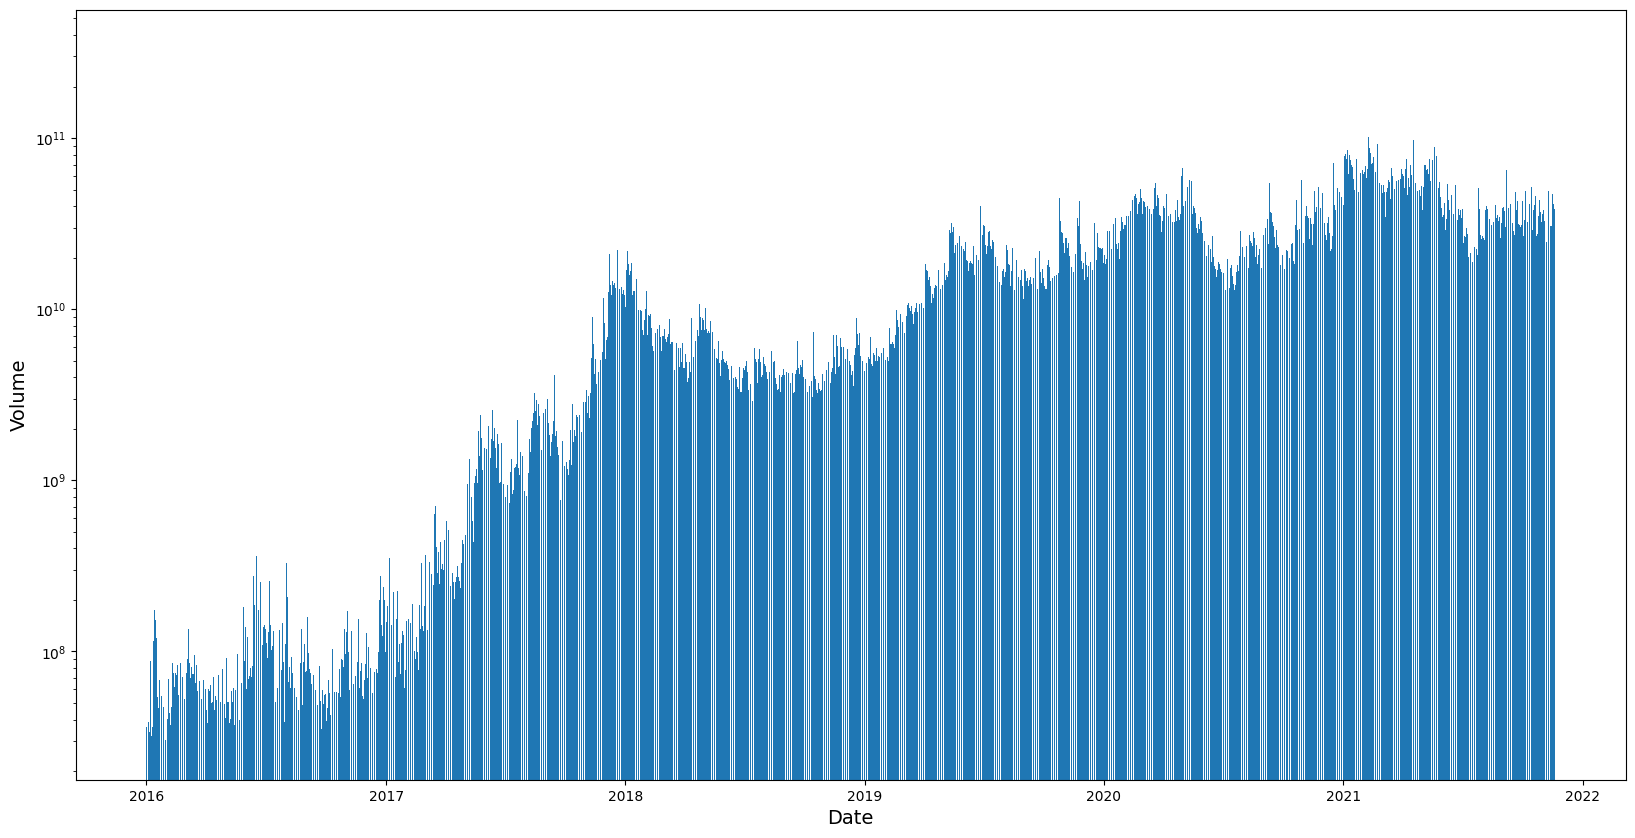

In [ ]:
#Gráfico 3

x = Dataset1['Date']
y = Dataset1['Volume']

plt.figure(figsize=(20,10))
plt.bar(x, y)

plt.xlabel("Date", fontsize=14)
plt.ylabel("Volume", fontsize=14)
plt.yscale("log")
plt.show()

5- ¿Como es la relación entre "Highs" y "Lows"?
La relación entre "Highs" Y "Lows" es creciente, siendo así que los mínimos son cada vez mayores y los máximos también.

6- ¿Tiene una pendiente creciente o decreciente?

La pendiente es creciente.

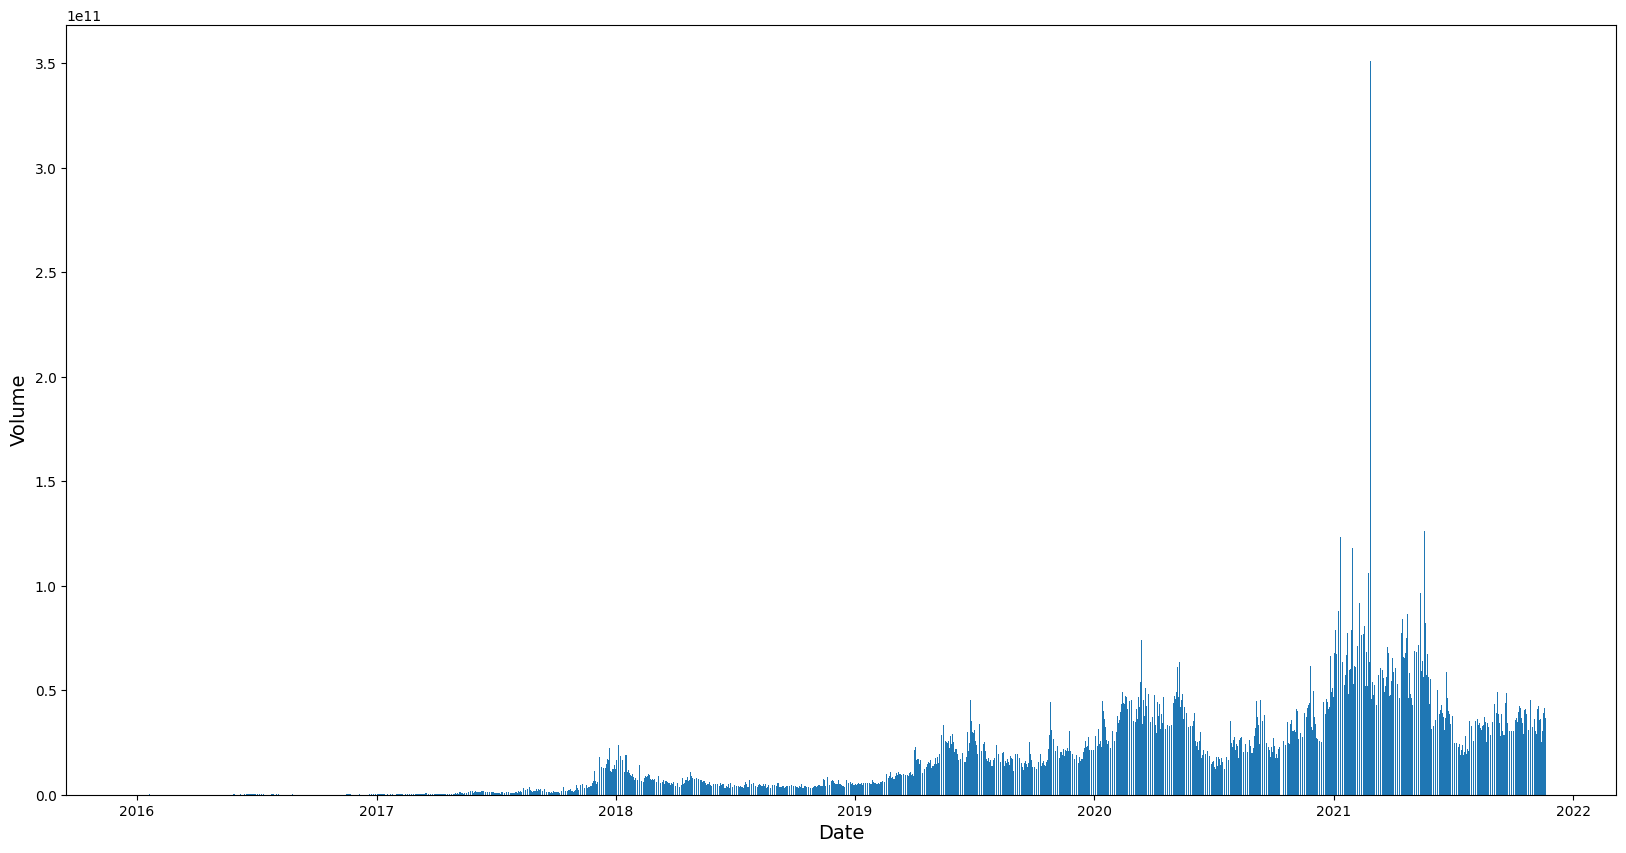

In [ ]:
#Gráfico 3 con escala distinta

x = Dataset1['Date']
y = Dataset1['Volume']

plt.figure(figsize=(20,10))
plt.bar(x, y)

plt.xlabel("Date", fontsize=14)
plt.ylabel("Volume", fontsize=14)

plt.show()

7- ¿Como es la relación entre el volumen y el tiempo?

El volumen fue en aumento con el correr del tiempo, esto se relaciona con la adopción del Bitcoin y otros factores.

8- ¿Fue aumentando o descendiendo?

El volumen aumentó, teniendo su pico en 2021.

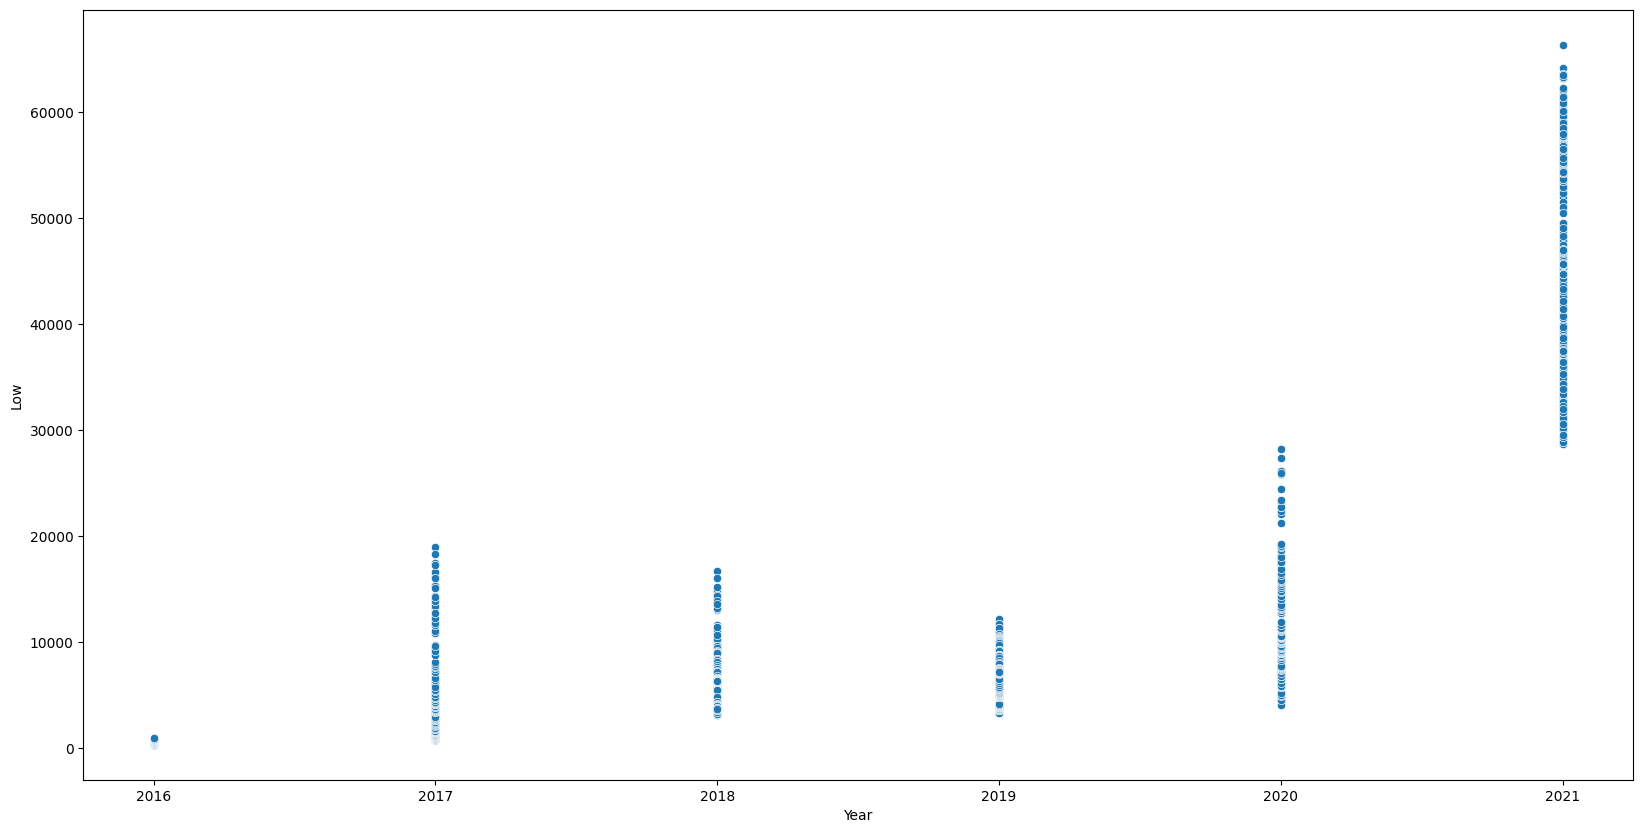

In [ ]:
#Gráfico 4

x = Dataset1['Year']
y = Dataset1['Low']


plt.figure(figsize=(20,10))
sns.scatterplot(x=x, y=y)
plt.show()

9- ¿Como se distribuyeron los mínimos en cada año?

Viendo el gráfico a gran escala, los mínimos fueron cada vez mayores.

10- ¿Como es la relación de mínimos entre los años?

En 2018 y 2019 se vieron mínimos menores (en promedio) a los del 2017. Desde 2019 a 2021 los mínimos fueron cada vez mayores.

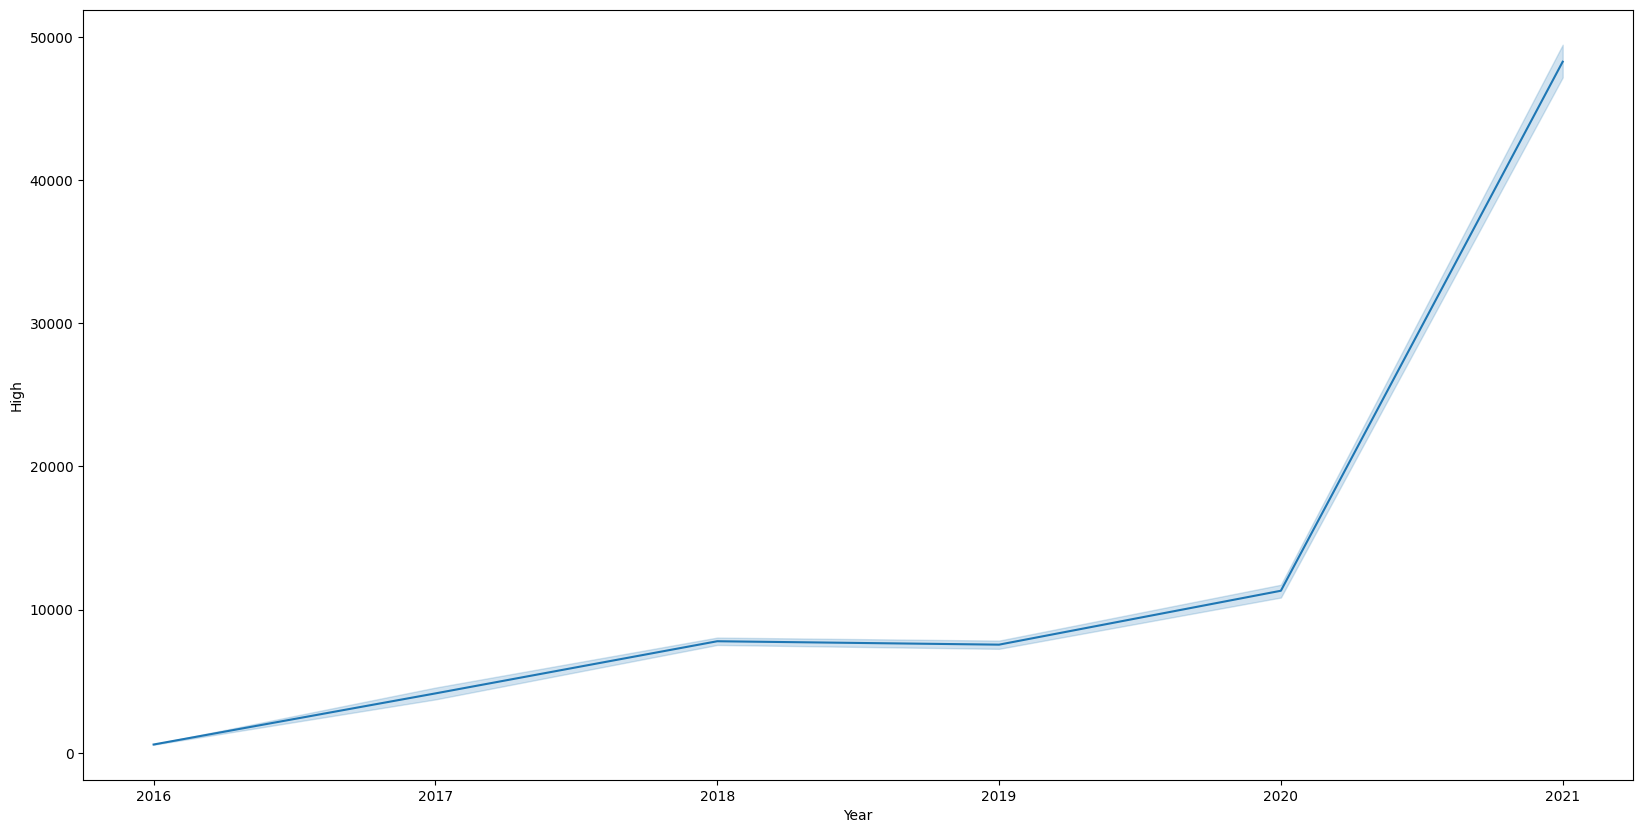

In [ ]:
#Gráfico 5

x = Dataset1['Year']
y = Dataset1['High']


plt.figure(figsize=(20,10))
sns.lineplot(x=x, y=y)
plt.show()

11- ¿Como se distribuyeron los máximos en cada año?

Los máximos aumentaron, siendo así cada vez mayores.

12- ¿Son máximos mayores o menores?

Los máximos son generalmente mayores, excepto entre 2018 y 2019 donde se mantuvieron casi constantes.


13- ¿Como es la relación entre los años, el volumen y el precio?

La relación entres los años, el volumen y el precio es creciente, aumentando así el volumen y el precio

14- ¿Hay alguna tendencia?

La tendencia general es alcista

In [ ]:
# Dividir los datos en conjuntos de entrenamiento, validación y prueba
X_train_val, X_test, y_train_val, y_test = train_test_split(Dataset1.drop(['Date'], axis=1), Dataset1['Close'], test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Crear una instancia del modelo de regresión lineal
reg = LinearRegression()

# Ajustar el modelo utilizando los datos de entrenamiento
reg.fit(X_train, y_train)

# Realizar predicciones sobre los datos de prueba
y_pred = reg.predict(X_test)

# Calcular el coeficiente de determinación
r2 = r2_score(y_test, y_pred)
print("R2: ", r2)

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)

# Calcular el error absoluto medio
mae = mean_absolute_error(y_test, y_pred)
print("MAE: ", mae)

# Calcular el ajuste R^2 ajustado
n = X_test.shape[0]
p = X_test.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R2: ", adj_r2)

R2:  1.0
MSE:  1.682181035259998e-16
MAE:  1.0552679970165035e-08
Adjusted R2:  1.0


Las métricas que se muestran corresponden a la evaluación del modelo de regresión lineal sobre los datos de prueba.

R2 (coeficiente de determinación) es una medida que indica la proporción de la varianza en la variable de respuesta que se explica por la variable explicativa. Tiene un rango de 0 a 1, siendo 1 el valor ideal que indica que el modelo ajustado explica perfectamente la variabilidad de los datos. En este caso, se obtuvo un valor de 1, lo que sugiere que el modelo se ajustó perfectamente a los datos de prueba.

MSE (error cuadrático medio) es una medida del promedio de los errores al cuadrado entre las observaciones reales y las predichas por el modelo. Tiene un rango de 0 a infinito, siendo 0 el valor ideal que indica que no hay errores en las predicciones. En este caso, se obtuvo un valor muy pequeño (del orden de 10^-16), lo que sugiere que las predicciones del modelo son muy cercanas a los valores reales.

MAE (error absoluto medio) es una medida del promedio de los errores absolutos entre las observaciones reales y las predichas por el modelo. Al igual que el MSE, tiene un rango de 0 a infinito, siendo 0 el valor ideal que indica que no hay errores en las predicciones. En este caso, se obtuvo un valor muy pequeño (del orden de 10^-8), lo que sugiere que las predicciones del modelo son muy precisas.

El R2 ajustado tiene en cuenta el número de variables explicativas y el tamaño de la muestra. En este caso, el valor obtenido es 1, lo que indica que todas las variables explicativas son útiles y que el modelo se ajusta adecuadamente a los datos de prueba.

**Método de Feature Selection**

- El método de Feature Selection que escogimos es el de Pearson, mejor conocido como coeficiente de correlación, caracterizado por ser una prueba que mide la relación estadística entre dos variables continuas. Elegimos este método debido a la asociación lineal de los elementos.

- Por otro lado, agregamos un mapa de calor que muestra todas las correlaciones de las variables y además, Agregamos los datos que correlación de "Close" en un apartado, ya que es una variable de nuestro interés

<ipython-input-26-6ca07f6d79a1>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



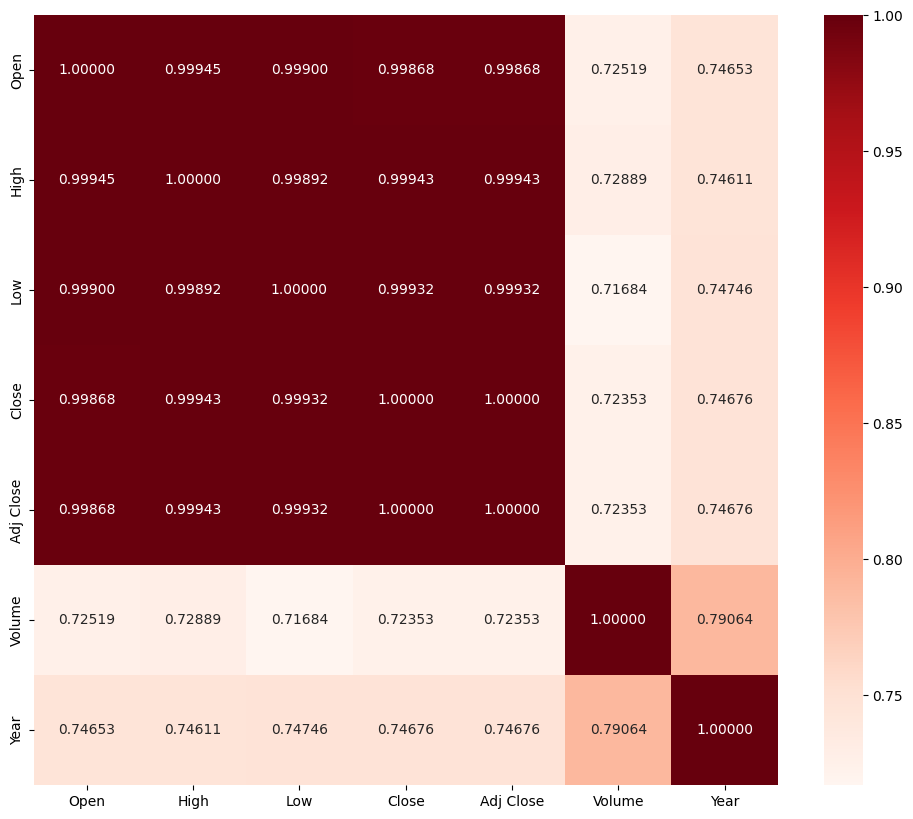

In [ ]:
plt.figure(figsize=(12,10))
cor = Dataset1.corr()
sns.heatmap(cor, annot=True, fmt=".5f", cmap=plt.cm.Reds)
plt.show()

In [ ]:
#Correlation with output variable
cor_target = abs(cor["Close"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

Open         0.998678
High         0.999433
Low          0.999325
Close        1.000000
Adj Close    1.000000
Volume       0.723533
Year         0.746763
Name: Close, dtype: float64

**Modelo de Series de tiempo**

Utilizamos ARIMA para hacer un modelo de autoregresión utilizando el Dataset completo menos los últimos 3 meses


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2144
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -17388.421
Date:                Mon, 01 May 2023   AIC                          34782.842
Time:                        18:28:03   BIC                          34799.851
Sample:                             0   HQIC                         34789.065
                               - 2144                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4889      0.214     -2.283      0.022      -0.909      -0.069
ma.L1          0.4560      0.220      2.074      0.038       0.025       0.887
sigma2      6.549e+05   6321.088    103.606      0.0

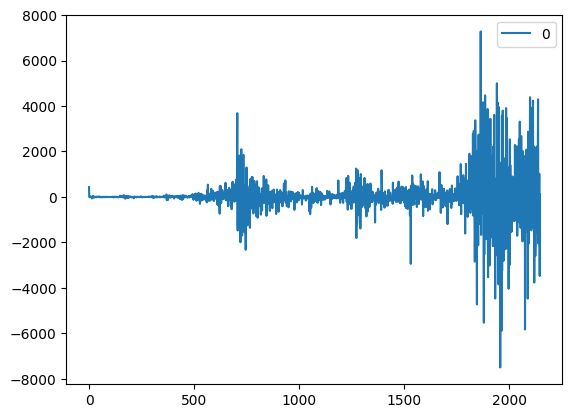

In [ ]:
# Ordenamos el DataFrame por el índice
Dataset1 = Dataset1.sort_index()

# Seleccionamos todo el Dataset excepto los últimos 3 meses
first_n_months = Dataset1.iloc[:-3]

# Ajustamos el modelo ARIMA a los datos
model = ARIMA(first_n_months['Close'], order=(1,1,1))
results = model.fit()

# Imprimimos el resumen del modelo
print(results.summary())

# Representamos gráficamente los residuos del modelo
residuals = pd.DataFrame(results.resid)
residuals.plot()
plt.show()




**Modelo de Series de tiempo (3 meses)**

Utilizamos ARIMA para hacer un modelo de autoregresión utilizando los últimos 3 meses del Dataset (Ciclo)

<ipython-input-29-8b0df77b2231>:5: UserWarning:

Discarding nonzero nanoseconds in conversion.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2147
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -17420.974
Date:                Mon, 01 May 2023   AIC                          34847.947
Time:                        18:28:04   BIC                          34864.962
Sample:                             0   HQIC                         34854.172
                               - 2147                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4919      0.193     -2.549      0.011      -0.870      -0.114
ma.L1          0.4551      0.199      2.290      0.022       0.066       0.845
sigma2        6.6e+05   6401.551    103.100      0.0

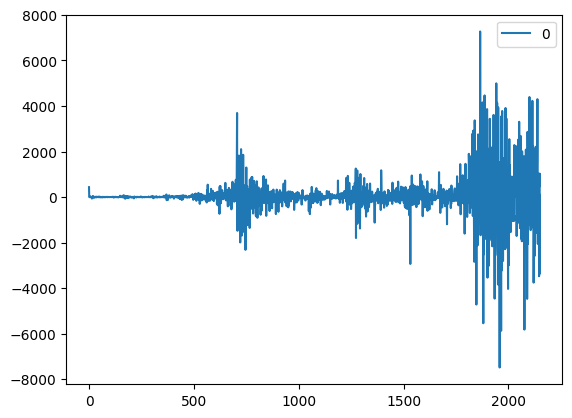

In [ ]:
# Ordenamos el DataFrame por el índice
Dataset1 = Dataset1.sort_index()

# Seleccionamos los últimos 3 meses del Dataset
last_3_months = Dataset1.loc[pd.DatetimeIndex(Dataset1.index) >= pd.to_datetime(Dataset1.index.max()) - pd.DateOffset(months=3)]

# Ajustamos el modelo ARIMA a los datos
model = ARIMA(last_3_months['Close'], order=(1,1,1))
results = model.fit()

# Imprimimos el resumen del modelo
print(results.summary())

# Representamos gráficamente los residuos del modelo
residuals = pd.DataFrame(results.resid)
residuals.plot()
plt.show()


## **Insights** 

**Libertad de pagos**
Con Bitcoin, podrás enviar y recibir cualquier cantidad de dinero instantáneamente desde y hacia cualquier lugar del mundo, en cualquier momento. Sin bancos con horarios. 
Sin fronteras. 
Sin límites impuestos. 
Los usuarios de Bitcoin siempre tienen un completo control sobre su dinero.

**Condiciones económicas:**
los modelos de valoración que existen actualmente para activos financieros son útiles para determinar el precio del Bitcoin.
Dentro de las condiciones económicas de un país que afectan el precio de las divisas en el
mercado se encuentra la inflación, al aumentar los precios el dinero pierde valor y, por el
contrario, cuando se da un proceso deflacionario, el valor de la moneda aumenta. Es por esto
que los países que mantienen sus niveles de inflación bajos mantienen su moneda con mayor
valor en el mercado.

**Menores riesgos** para los compradores Las transacciones con Bitcoin son seguras, irreversibles y no contienen datos personales ni privados de los clientes. Esto protege a comerciantes contra pérdidas ocasionadas por el fraude o devolución fraudulenta, y no es necesario el cumplimiento de las normas PCI.

**Transparente**
Toda la información sobre el suministro de Bitcoin está disponible en la cadena de bloques para cualquiera que quiera verificarlo y usarlo. Ningún individuo u organización puede controlar o manipular el protocolo Bitcoin porque es criptográficamente seguro. Se puede confiar en Bitcoin por ser completamente neutral, transparente y fiable.

**Tendencia alcista**
El precio del activo va aumentando conforme pasa el tiempo, esto nos demuestra una **Tendencia alcista**.

También podemos apreciar como los mínimos y máximos son cada vez **mayores**, demostrando así la tendencia alcista sobre la cual nos basamos.

**Volumen**
El **Volumen** también aumento, lo que demuestra la legitimidad que el mercado le da a este activo y como el interés está en unos de sus mayores momentos.

**Condiciones económicas:**
los modelos de valoración que existen actualmente para activos financieros son útiles para determinar el precio del Bitcoin.
Dentro de las condiciones económicas de un país que afectan el precio de las divisas en el
mercado se encuentra la inflación, al aumentar los precios el dinero pierde valor y, por el
contrario, cuando se da un proceso deflacionario, el valor de la moneda aumenta. Es por esto
que los países que mantienen sus niveles de inflación bajos mantienen su moneda con mayor
valor en el mercado.

**Correlación con el S&P 500**




In [3]:
Dataset2 = pd.read_csv("SPX.csv")

In [4]:
Dataset2


,Date,Open,High,Low,Close,Adj Close,Volume
0,12/30/1927,17.660000,17.660000,17.660000,17.660000,17.660000,0
1,1/3/1928,17.760000,17.760000,17.760000,17.760000,17.760000,0
2,1/4/1928,17.719999,17.719999,17.719999,17.719999,17.719999,0
3,1/5/1928,17.549999,17.549999,17.549999,17.549999,17.549999,0
4,1/6/1928,17.660000,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...,...,...
23318,10/29/2020,3277.169922,3341.050049,3259.820068,3310.110107,3310.110107,4903070000
23319,10/30/2020,3293.590088,3304.929932,3233.939941,3269.959961,3269.959961,4840450000
23320,11/2/2020,3296.199951,3330.139893,3279.739990,3310.239990,3310.239990,4310590000
23321,11/3/2020,3336.250000,3389.489990,3336.250000,3369.159912,3369.159912,4220070000


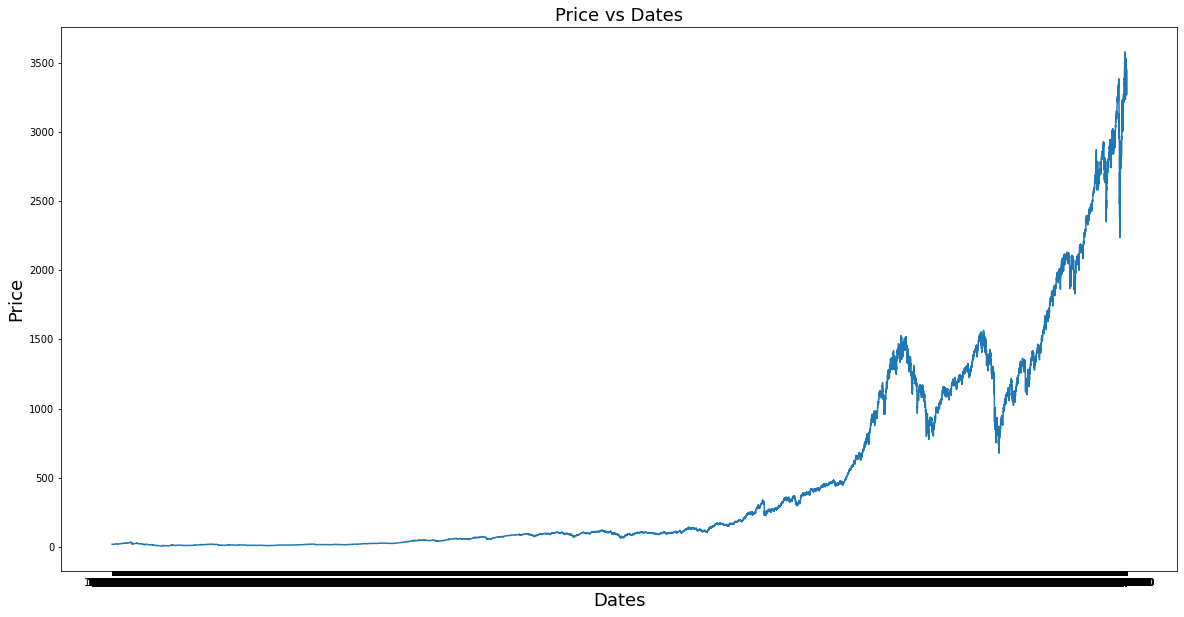

In [10]:
x = Dataset2['Date']
y = Dataset2['Close']

plt.figure(figsize=(20,10))

plt.xlabel('Dates', fontsize=18)
plt.ylabel('Price', fontsize=18, rotation=90)
plt.title('Price vs Dates', fontsize=18)
plt.plot(x, y)

plt.show()

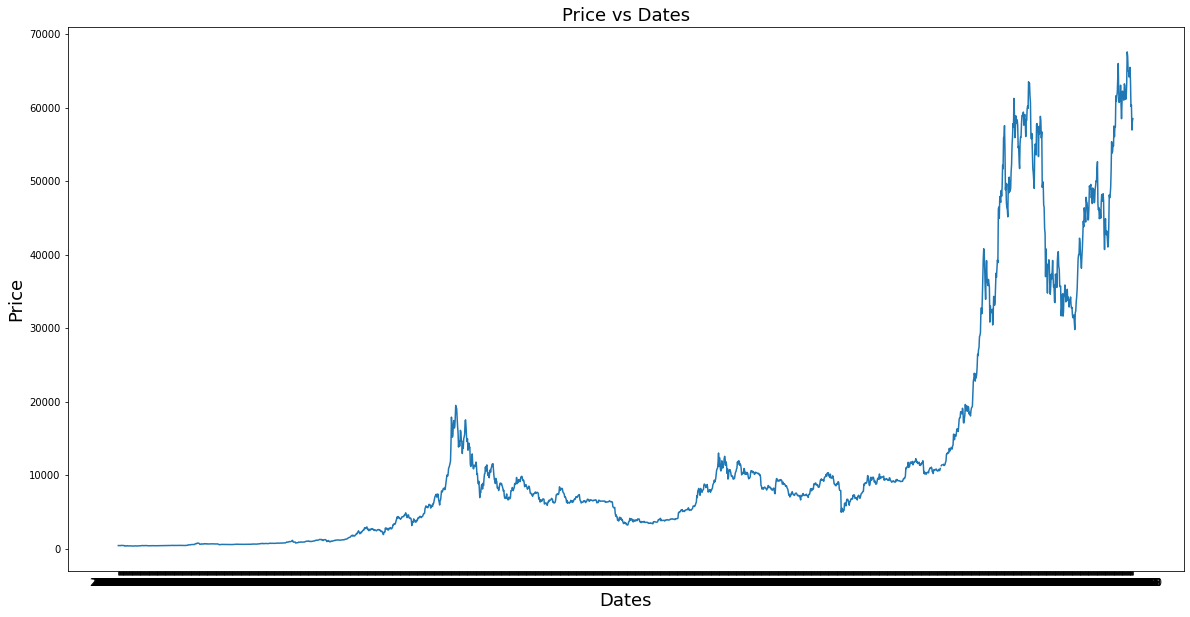

In [6]:
x = Dataset1['Date']
y = Dataset1['Close']

plt.figure(figsize=(20,10))

plt.xlabel('Dates', fontsize=18)
plt.ylabel('Price', fontsize=18, rotation=90)
plt.title('Price vs Dates', fontsize=18)
plt.plot(x, y)

plt.show()